In [1]:
using CSV, DataFrames, Dates, Plots, StatsBase, CategoricalArrays, StatsPlots, LinearAlgebra, Statistics, GLM, Optim, MLBase, LIBSVM, EvalMetrics, NamedArrays, DataTables, MLDataPattern, Tables, Plots, PyCall 

In [2]:
using NBInclude
@nbinclude("Functions.ipynb")

PCA_principal_components (generic function with 1 method)

In [3]:
graph_folder = "Graphes/"

"Graphes/"

# Débalancement

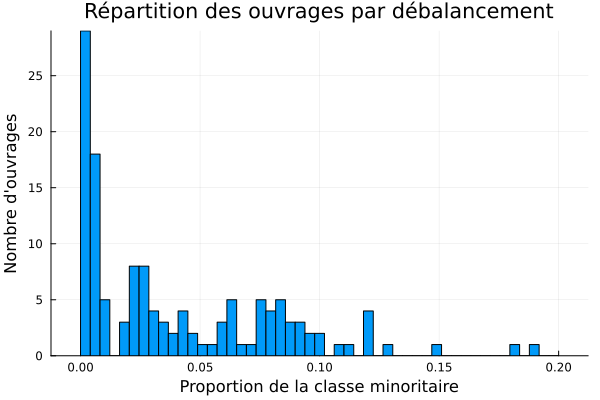

In [5]:
#Visualisation du débalancement des ouvrages
df = CSV.read(raw"Résultats\débalancement_cso.csv", DataFrame)

filter!(row -> row.Proportion_minority != 0, df)


#Figure 2.5
histogram(df.Proportion_minority, bins = range(0, 0.2, length=50), title = "Répartition des ouvrages par débalancement", legend = false)
xlabel!("Proportion de la classe minoritaire")
ylabel!("Nombre d'ouvrages")

In [18]:
savefig(graph_folder *"histo_débalancement.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\histo_débalancement.png"

# Distance et performance

In [7]:
#Visualisation des performances moyennes en fonction de la distance 
df = CSV.read(raw"Résultats\All OBXL\All_models_distance.csv", DataFrame)
df_15 = CSV.read(raw"Résultats\All OBXL\All_models_15min_distance.csv", DataFrame)
filter!(row -> row.Variables != "All", df)
filter!(row -> row.Variables != "All", df_15)
describe(df_15)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Variables,,"[""d12h"", ""d24h""]",,"[""d8h""]",0,String
2,F1,0.667383,0.0,0.684804,1.0,0,Float64
3,Threshold,0.263986,0.0277658,0.249401,0.673762,0,Float64
4,OBXL,1299.26,1011,1291.0,1611,0,Int64
5,Test_year,2019.69,2016,2020.0,2020,0,Int64
6,Site,,0642-01D,,4795-01D,0,String15
7,OBXL_X,2.91732e5,2.63632e5,2.94912e5,3.04806e5,0,Float64
8,OBXL_Y,5.0432e6,5.0272e6,5.04288e6,5.06093e6,0,Float64
9,Site_X,2.94903e5,2.74667e5,2.96542e5,3.06365e5,0,Float64


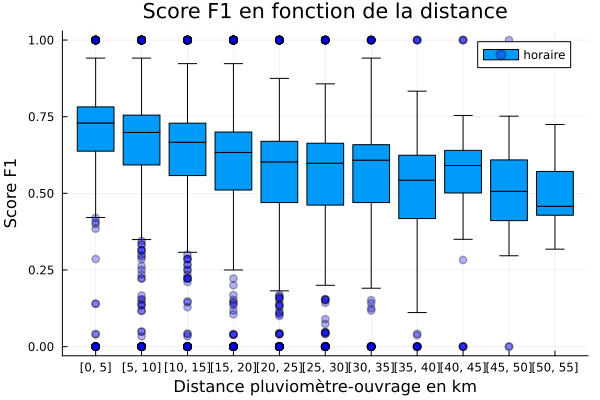

In [8]:
bins = 0:5000:maximum(df.Distance)+5000
df.x_bin = cut(df.Distance, bins)

#Figure 4.1
@df df boxplot(:x_bin,:F1, label = "horaire", marker=(0.3,:blue,stroke(2)), alpha = 1)
#@df df boxplot(:x_15_bin, df[:, "15_F1"], label = "15 min", marker=(0.3,:orange,stroke(2)), alpha = 0.5)
xticks!(1:30, string.([ "["*string(Int(bins[i]/1000))*", "*string(Int(bins[i+1]/1000))* "]"  for i in 1:length(bins)-1]))
title!("Score F1 en fonction de la distance")
xlabel!("Distance pluviomètre-ouvrage en km")
ylabel!("Score F1")

In [313]:
savefig(graph_folder *"boxplot_distance_all_horaire.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\boxplot_distance_all_horaire.png"

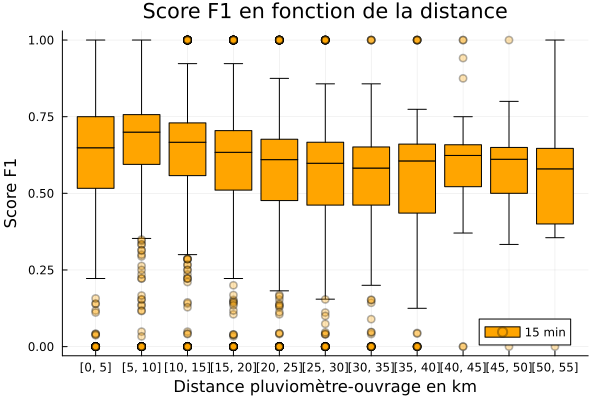

In [9]:
#Figure 4.2

df_15.x_15_bin = cut(df_15[:,"Distance"], bins)
@df df_15 boxplot(:x_15_bin, df[:, "F1"], label = "15 min", marker=(0.3,:orange,stroke(2)),color = "orange", alpha = 1)
xticks!(1:15, string.([ "["*string(Int(bins[i]/1000))*", "*string(Int(bins[i+1]/1000))* "]"  for i in 1:length(bins)-1]))
title!("Score F1 en fonction de la distance")
xlabel!("Distance pluviomètre-ouvrage en km")
ylabel!("Score F1")

In [289]:
savefig(graph_folder *"boxplot_distance_all_15min.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\boxplot_distance_all_15min.png"

# Distance meilleures paires ouvrage-pluviomètre

In [11]:
# Visualisation des performances lorsque le meilleur modèle uniquement est considéré en fonction de la distance pluviomètre-ouvrage

df = CSV.read(raw"Résultats\All OBXL\Best_models_distance.csv", DataFrame)
df_15 = CSV.read(raw"Résultats\All OBXL\Best_models_15min_distance.csv", DataFrame)
filter!(row -> row.Variables != "All", df)
filter!(row -> row.Variables != "All", df_15)
df[!,:donnees] .= "Horaire"
df_15[!,:donnees] .= "15 minutes"

df = vcat(df, df_15)
df.Distance .= df.Distance ./1000
println(describe(df_15))
describe(df)

12×7 DataFrame
 Row │ variable   mean       min               median     max         nmissing  eltype   
     │ Symbol     Union…     Any               Union…     Any         Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────────────
   1 │ Variables             ["d12h", "d24h"]             ["d6h"]            0  String
   2 │ F1         0.827753   0.0               0.814001   1.0                0  Float64
   3 │ Threshold  0.32747    0.0368127         0.362016   0.608185           0  Float64
   4 │ OBXL       1318.41    1011              1311.0     1601               0  Int64
   5 │ Test_year  2019.73    2016              2020.0     2020               0  Int64
   6 │ Site                  0642-01D                     4795-01D           0  String15
   7 │ OBXL_X     2.93807e5  2.63632e5         2.97007e5  3.04806e5          0  Float64
   8 │ OBXL_Y     5.04442e6  5.02809e6         5.04349e6  5.05971e6          0  Float64
   9 │ Site_X  

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Variables,,"[""d12h"", ""d24h""]",,"[""d6h""]",0,String
2,F1,0.815323,0.0,0.802514,1.0,0,Float64
3,Threshold,0.323651,0.0278302,0.335903,0.63932,0,Float64
4,OBXL,1317.21,1011,1311.0,1611,0,Int64
5,Test_year,2019.73,2016,2020.0,2020,0,Int64
6,Site,,0642-01D,,4795-01D,0,String15
7,OBXL_X,2.93937e5,2.63632e5,2.97173e5,3.04806e5,0,Float64
8,OBXL_Y,5.04442e6,5.02809e6,5.04313e6,5.05971e6,0,Float64
9,Site_X,294191.0,2.74268e5,2.95873e5,3.06365e5,0,Float64


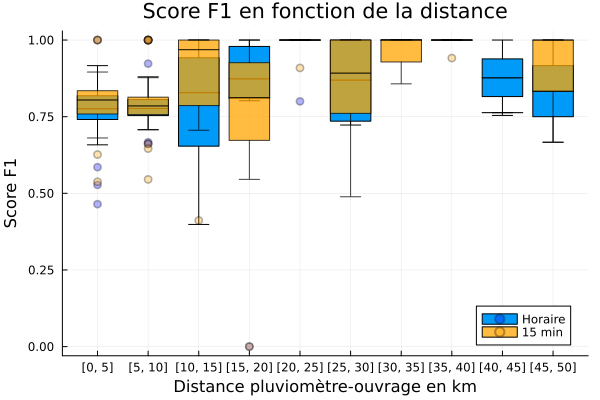

In [12]:
bins = 0:5:maximum(df_15.Distance)+5
df.x_bin = cut(df.Distance, bins)

boxplot(df.x_bin[df.donnees .== "Horaire"],df.F1[df.donnees .== "Horaire"] ,label = "Horaire", marker=(0.3,:blue,stroke(2)), alpha = 1)
boxplot!(df.x_bin[df.donnees .== "15 minutes"],df.F1[df.donnees .== "15 minutes"] , label = "15 min", marker=(0.3,:orange,stroke(2)), color = "orange", alpha = .75)
#@df df boxplot(:x_15_bin, df[:, "15_F1"], label = "15 min", marker=(0.3,:orange,stroke(2)), alpha = 0.5)
xticks!(1:10, string.([ "["*string(Int(bins[i]))*", "*string(Int(bins[i+1]))* "]"  for i in 1:length(bins)-1]))
title!("Score F1 en fonction de la distance")
xlabel!("Distance pluviomètre-ouvrage en km")
ylabel!("Score F1")

In [326]:
savefig(graph_folder *"boxplot_distance_best_comparaison.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\boxplot_distance_best_comparaison.png"

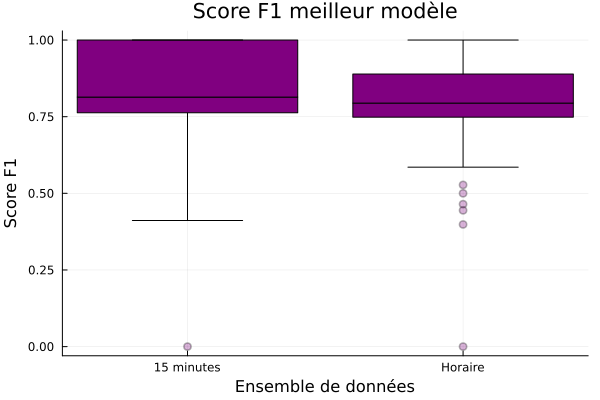

In [13]:
#Figure 4.3 (b)
@df df boxplot(:donnees, :F1, label = "", marker=(0.3,:purple,stroke(2)),color = "purple", alpha = 1)
title!("Score F1 meilleur modèle")
xlabel!("Ensemble de données")
ylabel!("Score F1")

In [265]:
savefig(graph_folder *"boxplot_F1_best_comparaison.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\boxplot_F1_best_comparaison.png"

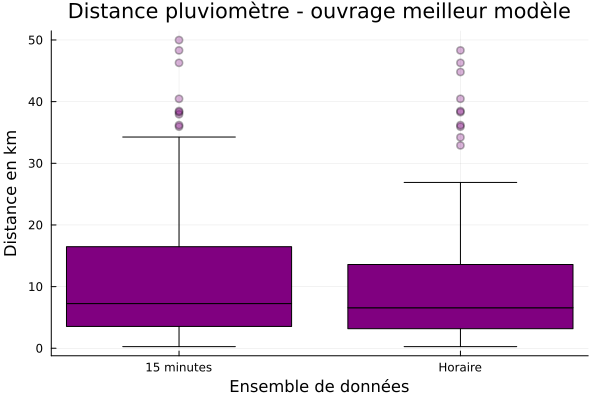

In [14]:
#Figure 4.3 (a)
@df df boxplot(:donnees, :Distance, label = "", marker=(0.3,:purple,stroke(2)),color = "purple", alpha = 1)
title!("Distance pluviomètre - ouvrage meilleur modèle")
xlabel!("Ensemble de données")
ylabel!("Distance en km")

In [309]:
savefig(graph_folder *"boxplot_full_Distance_best_comparaison.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\boxplot_full_Distance_best_comparaison.png"

# Variables 15 minutes et performance

In [16]:
df = CSV.read(raw"Résultats\All OBXL\Best_models_distance.csv", DataFrame)
df_15 = CSV.read(raw"Résultats\All OBXL\Best_models_15min_distance.csv", DataFrame)
filter!(row -> row.Variables != "All", df)
filter!(row -> row.Variables != "All", df_15)
df.Distance .= df.Distance ./1000
df_15.Distance .= df_15.Distance ./1000
rename!(df_15, [:F1, :OBXL, :Distance] .=> "15_" .*["F1", "OBXL", "Distance"])
select!(df, ["F1", "OBXL", "Distance", "Site"])
select!(df_15,vcat("15_" .*["F1", "OBXL", "Distance"], "Site"))

df = innerjoin(df, df_15, on = :Site)
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,F1,0.802892,0.0,0.794311,1.0,0,Float64
2,OBXL,1316.0,1011,1291.0,1611,0,Int64
3,Distance,10.8422,0.270258,6.56795,48.3137,0,Float64
4,Site,,0642-01D,,4795-01D,0,String15
5,15_F1,0.827753,0.0,0.814001,1.0,0,Float64
6,15_OBXL,1318.41,1011,1311.0,1601,0,Int64
7,15_Distance,11.8544,0.270258,7.25134,49.9851,0,Float64


In [17]:
df[!, :Diff_F1] = df[:, "15_F1"] - df[:, :F1]
df[!, :Diff_Dist] = df[:, "15_Distance"] - df[:, :Distance]
select!(df, Not(["F1", "15_F1", "Distance", "15_Distance"]))
filter!(row -> row.Diff_F1 != 0, df)

describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,OBXL,1365.27,1061,1346.0,1611,0,Int64
2,Site,,0672-02D,,4795-01D,0,String15
3,15_OBXL,1379.54,1031,1396.0,1601,0,Int64
4,Diff_F1,0.0339564,0.000127,0.0127539,0.323944,0,Float64
5,Diff_Dist,1.41752,-13.41,0.0,26.8325,0,Float64


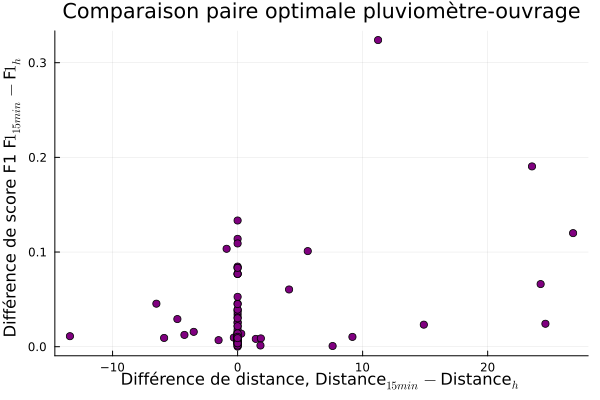

In [18]:
#Visualisation de l'évolution de performance et de la distance optimale, lors de l'ajout de variables d'accumulation temporelle aux 15 minutes
scatter(df.Diff_Dist, df.Diff_F1, color = "purple", label ="")
title!("Comparaison paire optimale pluviomètre-ouvrage")
xlabel!("Différence de distance, Distance\$_{15min} - \$Distance\$_{h}\$")
ylabel!("Différence de score F1 F\$1_{15min} - \$F\$1_{h}\$ ")

In [271]:
savefig(graph_folder *"scatterplot_F1etDist_best_difference.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\scatterplot_F1etDist_best_difference.png"

# Variabilité rééchantillonage, pluviomètres ville de Montréal

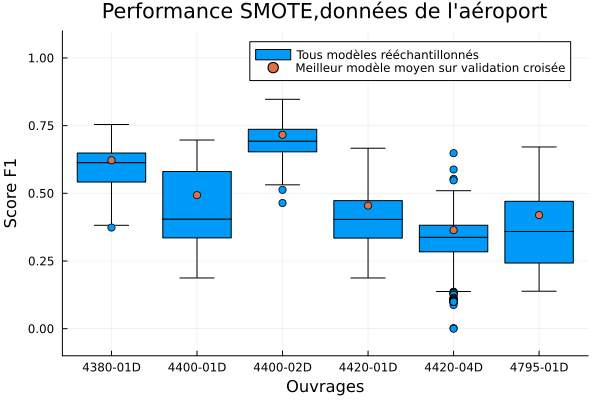

In [19]:
# Visualisation de la variabilité du rééchantillonage, SMOTE

df_SMOTE = CSV.read(raw"Résultats\5.1.1.1\5.1.1.1 - CV Occurence regression logistique SMOTE.csv", DataFrame)

#Figure 4.4 (a)
@df df_SMOTE boxplot(:Site, :F1, label = "Tous modèles rééchantillonnés")
scatter!(["4380-01D", "4400-01D", "4400-02D", "4420-01D", "4420-04D", "4795-01D"], [0.622, 0.4934, 0.7162, 0.4547, 0.3641, 0.4197], label = "Meilleur modèle moyen sur validation croisée")

title!("Performance SMOTE,données de l'aéroport")
xlabel!("Ouvrages")
ylabel!("Score F1")
ylims!(-0.1,1.1)

In [7]:
savefig(graph_folder *"boxplot_stabilite_smote_aero.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\boxplot_stabilite_smote_aero.png"

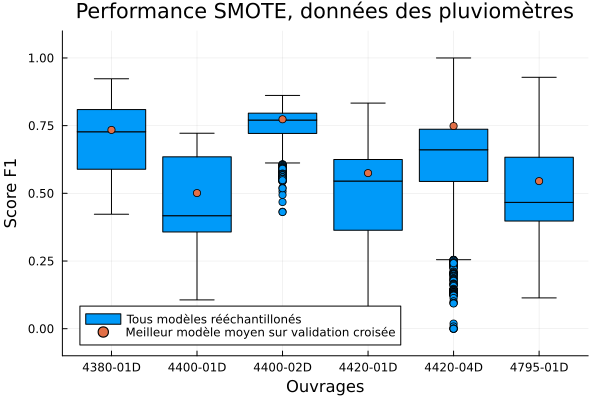

In [22]:
#Figure 4.4 (b)

df_SMOTE = CSV.read(raw"Résultats\5.1.1.4\5.1.1.4 - CV Occurence regression logistique SMOTE.csv", DataFrame)

@df df_SMOTE boxplot(:Site, :F1, label = "Tous modèles rééchantillonés")
scatter!(["4380-01D", "4400-01D", "4400-02D", "4420-01D", "4420-04D", "4795-01D"], [0.7341, 0.5010, 0.7735, 0.5747, 0.7486, 0.5451], label = "Meilleur modèle moyen sur validation croisée")

title!("Performance SMOTE, données des pluviomètres")
xlabel!("Ouvrages")
ylabel!("Score F1")
ylims!(-0.1,1.1)

In [11]:
savefig(graph_folder *"boxplot_stabilite_smote_pluvio.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\boxplot_stabilite_smote_pluvio.png"

# Performances transformations lambda

## Données de l'aéroport

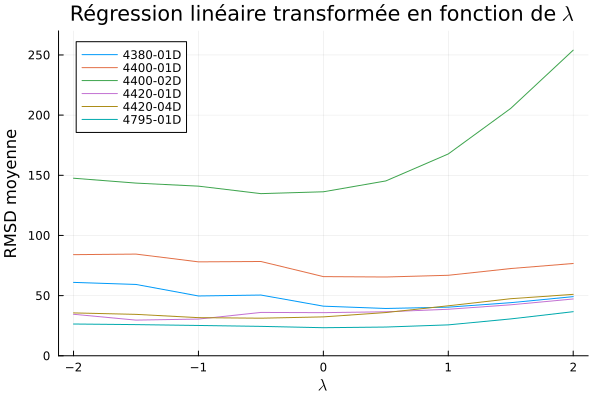

In [31]:
# Performances de la prédiction de la durée en fonction de la transformation appliquée
# Avec les données de l'aéroport de Montréal
df = CSV.read(raw"Résultats\5.1.1.1\5.1.1.1 - CV moyenne Duree regression lineaire automatic all lambda.csv", DataFrame)

filter!(row -> row.Lambda in -2:0.5:2, df)

df_site = groupby(df, :Site)
best_mods = DataFrame()
for i in df_site
    this = combine(groupby(i, :Lambda), :RMSD_mean => minimum => :RMSD_mean)
    this[!, :Site] .= i.Site[1]
    best_mods = vcat(best_mods, this)
end

# Figure 5.1 (a)

@df best_mods plot(:Lambda, :RMSD_mean, group = :Site, linewidth = 1)
title!("Régression linéaire transformée en fonction de \$\\lambda\$")
xlabel!("\$\\lambda\$")
ylabel!("RMSD moyenne")
ylims!(0,270)

In [17]:
savefig(graph_folder *"plot_aero_lin_lambda.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\plot_aero_lin_lambda.png"

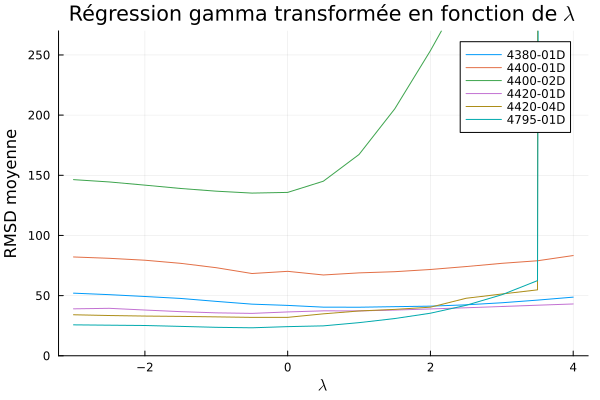

In [28]:
df = CSV.read(raw"Résultats\5.1.1.1\5.1.1.1 - CV moyenne Duree regression gamma automatic all lambda.csv", DataFrame)

filter!(row -> row.Lambda in -3:0.5:4, df)

df_site = groupby(df, :Site)
best_mods = DataFrame()
for i in df_site
    this = combine(groupby(i, :Lambda), :RMSD_mean => minimum => :RMSD_mean)
    this[!, :Site] .= i.Site[1]
    best_mods = vcat(best_mods, this)
end

# Figure 5.1 (b)

@df best_mods plot(:Lambda, :RMSD_mean, group = :Site, linewidth = 1)
ylims!(0,250)
title!("Régression gamma transformée en fonction de \$\\lambda\$")
xlabel!("\$\\lambda\$")
ylabel!("RMSD moyenne")
ylims!(0,270)

In [19]:
savefig(graph_folder *"plot_aero_gamma_lambda.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\plot_aero_gamma_lambda.png"

## Données des pluviomètres de la ville de Montréal

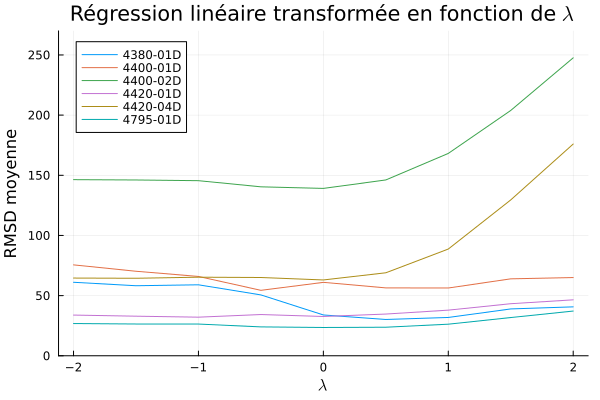

In [32]:
# Performances de la prédiction de la durée en fonction de la transformation appliquée
# Avec les données du meilleur pluviomètre pour chaque ouvrage

df = CSV.read(raw"Résultats\5.1.1.4\5.1.1.4 - CV moyenne Duree regression lineaire automatic all lambda.csv", DataFrame)

filter!(row -> row.Lambda in -2:0.5:2, df)

df_site = groupby(df, :Site)
best_mods = DataFrame()
for i in df_site
    this = combine(groupby(i, :Lambda), :RMSD_mean => minimum => :RMSD_mean)
    this[!, :Site] .= i.Site[1]
    best_mods = vcat(best_mods, this)
end

# Figure 5.2 (a)


@df best_mods plot(:Lambda, :RMSD_mean, group = :Site, linewidth = 1)
title!("Régression linéaire transformée en fonction de \$\\lambda\$")
xlabel!("\$\\lambda\$")
ylabel!("RMSD moyenne")
ylims!(0,270)

In [21]:
savefig(graph_folder *"plot_pluvio_lin_lambda.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\plot_pluvio_lin_lambda.png"

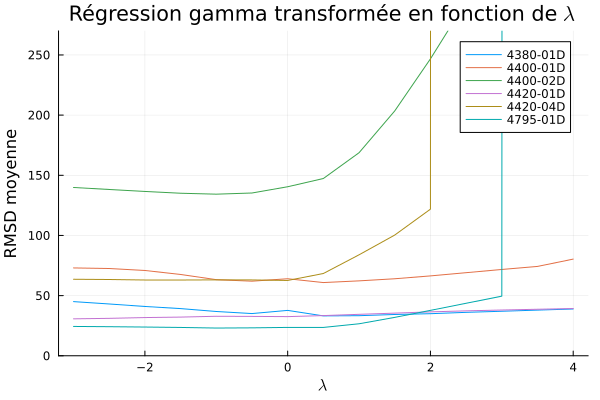

In [33]:
df = CSV.read(raw"C:\Users\takum\Downloads\Recherche\TakumiTherville\AAA - Final(&) scripts\Résultats\5.1.1.4\5.1.1.4 - CV moyenne Duree regression gamma automatic all lambda.csv", DataFrame)

filter!(row -> row.Lambda in -3:0.5:4, df)

df_site = groupby(df, :Site)
best_mods = DataFrame()
for i in df_site
    this = combine(groupby(i, :Lambda), :RMSD_mean => minimum => :RMSD_mean)
    this[!, :Site] .= i.Site[1]
    best_mods = vcat(best_mods, this)
end

# Figure 5.2 (b)

@df best_mods plot(:Lambda, :RMSD_mean, group = :Site, linewidth = 1)
ylims!(0,250)
title!("Régression gamma transformée en fonction de \$\\lambda\$")
xlabel!("\$\\lambda\$")
ylabel!("RMSD moyenne")
ylims!(0,270)

In [23]:
savefig(graph_folder *"plot_pluvio_gamma_lambda.png")

"C:\\Users\\takum\\Downloads\\Recherche\\TakumiTherville\\AAA - Final(&) scripts\\Graphes\\plot_pluvio_gamma_lambda.png"

# Performances données radar

## Données observées

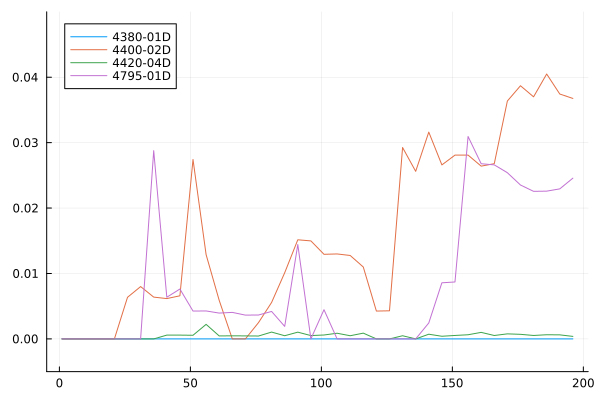

In [38]:
# Performances PCA uniquement
df_pure = CSV.read(raw"Résultats\5.3\5.3 - PCA_pure_F1.csv", DataFrame)
@df df_pure plot(:k, :F1, group = :Site, linewidth = 1)
ylims!(-0.005, 0.05)

In [39]:
# Importation des performances des autres méthodes et concaténation au tableau des performances
df_PCA_RUS = CSV.read(raw"Résultats\5.3\5.3 - moyenne_PCA_RUS_F1_.csv", DataFrame)
df_PCA_RUS[!, :Method] .= "PCA-RUS"
df_PCA_ROS = CSV.read(raw"Résultats\5.3\5.3 - moyenne_PCA_ROS_F1_.csv", DataFrame)
df_PCA_ROS[!, :Method] .= "PCA-ROS"
df = vcat(df_PCA_RUS,df_PCA_ROS)
df_PCA_SMOTE = CSV.read(raw"Résultats\5.3\5.3 - moyenne_PCA_SMOTE_F1_.csv", DataFrame)
df_PCA_SMOTE[!, :Method] .= "PCA-SMOTE"
df = vcat(df, df_PCA_SMOTE)

df_RUS_PCA = CSV.read(raw"Résultats\5.3\5.3 - moyenne_RUS_PCA_F1_.csv", DataFrame)
df_RUS_PCA[!, :Method] .= "RUS-PCA"
df = vcat(df, df_RUS_PCA)
df_ROS_PCA = CSV.read(raw"Résultats\5.3\5.3 - moyenne_ROS_PCA_F1_.csv", DataFrame)
df_ROS_PCA[!, :Method] .= "ROS-PCA"
df = vcat(df, df_ROS_PCA)
df_SMOTE_PCA = CSV.read(raw"Résultats\5.3\5.3 - moyenne_SMOTE_PCA_F1_.csv", DataFrame)
df_SMOTE_PCA[!, :Method] .= "SMOTE-PCA"
df = vcat(df, df_SMOTE_PCA)

df_pure[!, :Method] .= "PCA"
rename!(df_pure, :F1 => :F1_mean)
df = vcat(df, df_pure)

df_PLSDA = CSV.read(raw"Résultats\5.3\5.3 - moyenne_PLSDA_F1_.csv", DataFrame)
df_PLSDA[!, :Method] .= "PLS-DA"
df = vcat(df,df_PLSDA)

Row,k,F1_mean,Cumulative_var,Site,Method
,Int64,Float64,Float64,String15,String
1,1,0.00661964,0.69073,4380-01D,PCA-RUS
2,6,0.00408462,0.894951,4380-01D,PCA-RUS
3,11,0.00416324,0.945395,4380-01D,PCA-RUS
4,16,0.00301637,0.964462,4380-01D,PCA-RUS
5,21,0.00256836,0.974441,4380-01D,PCA-RUS
6,26,0.00295933,0.980355,4380-01D,PCA-RUS
7,31,0.0030308,0.984518,4380-01D,PCA-RUS
8,36,0.00247556,0.987697,4380-01D,PCA-RUS
9,41,0.00238457,0.990133,4380-01D,PCA-RUS


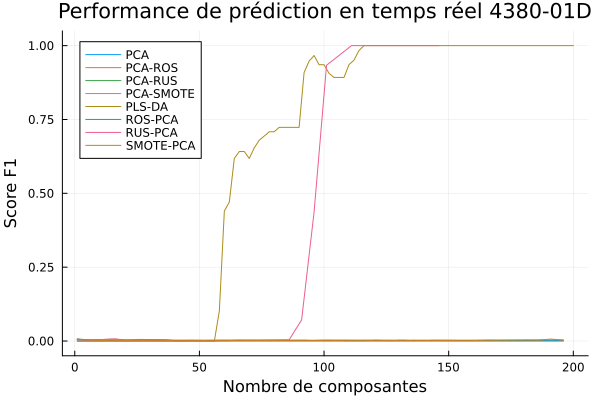

In [41]:
# Visualisation par ouvrage
# Figure 6.1 (a)

this_site = filter(row-> row.Site == "4380-01D", df)

@df this_site plot(:k, :F1_mean, group = :Method, legend = :topleft)
ylims!(-0.05,1.05)
title!("Performance de prédiction en temps réel 4380-01D")
xlabel!("Nombre de composantes")
ylabel!("Score F1")
#savefig(graph_folder *"plot_4380-01D_obsobs.png")

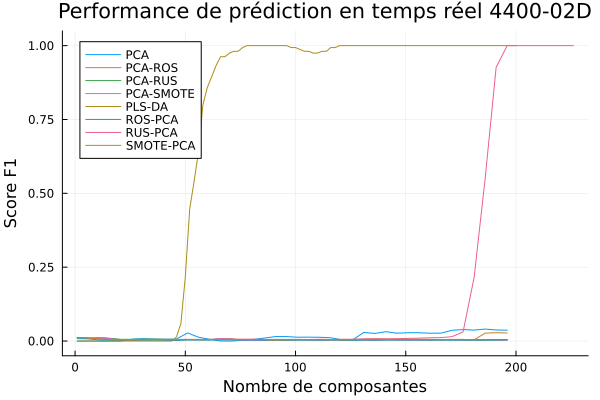

In [42]:
# Visualisation par ouvrage
# Figure 6.1 (b)

this_site = filter(row-> row.Site == "4400-02D", df)

@df this_site plot(:k, :F1_mean, group = :Method)
ylims!(-0.05,1.05)
title!("Performance de prédiction en temps réel 4400-02D")
xlabel!("Nombre de composantes")
ylabel!("Score F1")
#savefig(graph_folder *"plot_4400-02D_obsobs.png")

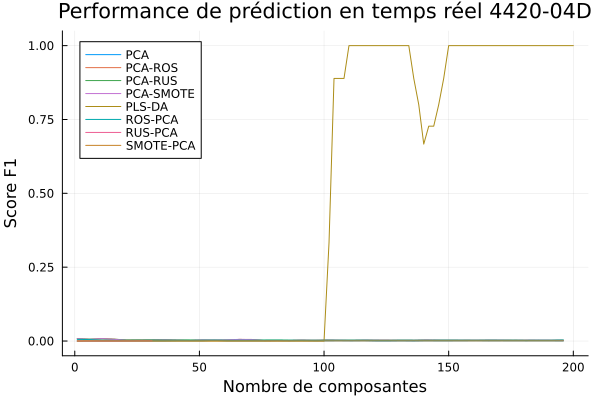

In [43]:
# Visualisation par ouvrage
# Figure 6.1 (c)

this_site = filter(row-> row.Site == "4420-04D", df)

@df this_site plot(:k, :F1_mean, group = :Method)
ylims!(-0.05,1.05)
title!("Performance de prédiction en temps réel 4420-04D")
xlabel!("Nombre de composantes")
ylabel!("Score F1")
#savefig(graph_folder *"plot_4420-04D_obsobs.png")

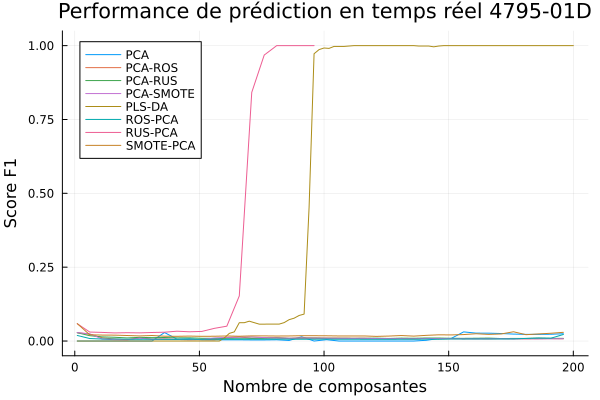

In [44]:
# Visualisation par ouvrage
# Figure 6.1 (d)

this_site = filter(row-> row.Site == "4795-01D", df)

@df this_site plot(:k, :F1_mean, group = :Method)
ylims!(-0.05,1.05)
title!("Performance de prédiction en temps réel 4795-01D")
xlabel!("Nombre de composantes")
ylabel!("Score F1")
#savefig(graph_folder *"plot_4795-01D_obsobs.png")

### Données observées visualisation sur données des performances : RUS-PCA et PLS-DA

In [9]:
#Importation des données 
df = CSV.read(raw"Données\Pixels_proches_accumulation_surversejoint", DataFrame)
train = filter(row -> Dates.year(row.Date) == 2020,df)
test = filter(row -> Dates.year(row.Date) == 2021,df)

Row,Date,42018_d10min,42018_d20min,42018_d30min,42018_d40min,42018_d50min,42018_d1h,42018_d2h,42018_d3h,42018_d4h,42018_d6h,42018_d8h,42018_d12h,42018_d18h,42018_d24h,43018_d10min,43018_d20min,43018_d30min,43018_d40min,43018_d50min,43018_d1h,43018_d2h,43018_d3h,43018_d4h,43018_d6h,43018_d8h,43018_d12h,43018_d18h,43018_d24h,44018_d10min,44018_d20min,44018_d30min,44018_d40min,44018_d50min,44018_d1h,44018_d2h,44018_d3h,44018_d4h,44018_d6h,44018_d8h,44018_d12h,44018_d18h,44018_d24h,42017_d10min,42017_d20min,42017_d30min,42017_d40min,42017_d50min,42017_d1h,42017_d2h,42017_d3h,42017_d4h,42017_d6h,42017_d8h,42017_d12h,42017_d18h,42017_d24h,43017_d10min,43017_d20min,43017_d30min,43017_d40min,43017_d50min,43017_d1h,43017_d2h,43017_d3h,43017_d4h,43017_d6h,43017_d8h,43017_d12h,43017_d18h,43017_d24h,44017_d10min,44017_d20min,44017_d30min,44017_d40min,44017_d50min,44017_d1h,44017_d2h,44017_d3h,44017_d4h,44017_d6h,44017_d8h,44017_d12h,44017_d18h,44017_d24h,42016_d10min,42016_d20min,42016_d30min,42016_d40min,42016_d50min,42016_d1h,42016_d2h,42016_d3h,42016_d4h,42016_d6h,42016_d8h,42016_d12h,42016_d18h,42016_d24h,43016_d10min,⋯
,DateTime,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,2021-05-01T00:00:00,1.5,3.6,5.4,6.3,9.0,15.5,31.3,36.9,50.6,58.9,75.3,106.5,170.4,188.0,2.7,5.4,6.7,8.2,10.3,18.9,33.3,40.4,52.6,62.2,76.6,102.0,169.5,187.4,2.7,4.8,6.6,7.5,8.4,17.0,27.5,34.8,43.5,53.2,68.4,91.9,154.5,174.9,1.5,3.3,5.4,7.5,10.7,16.3,32.1,37.9,51.7,60.1,73.3,99.5,165.5,191.2,2.4,4.5,7.2,8.2,9.2,16.7,29.6,35.5,47.4,55.8,68.2,92.4,157.3,177.4,2.7,5.9,7.7,8.9,9.9,17.4,28.0,34.5,45.6,54.7,70.1,94.1,158.8,176.9,2.1,3.6,4.9,6.1,9.3,14.9,27.1,33.0,43.7,52.5,65.0,90.1,148.8,170.4,2.4,⋯
2,2021-05-01T00:10:00,1.3,2.8,4.9,6.7,7.6,10.3,31.1,36.7,50.9,59.0,75.7,104.6,171.0,189.3,3.2,5.9,8.6,9.9,11.4,13.5,35.5,40.4,54.8,64.1,78.8,103.4,172.0,190.6,4.2,6.9,9.0,10.8,11.7,12.6,30.7,35.8,47.1,55.9,71.4,94.6,158.0,179.1,2.1,3.6,5.4,7.5,9.6,12.8,32.4,38.2,53.1,61.5,74.4,99.8,167.1,193.3,2.7,5.1,7.2,9.9,10.9,11.9,31.1,36.4,49.2,57.3,70.0,93.8,159.5,180.1,3.2,5.9,9.1,10.9,12.1,13.1,29.7,35.3,47.9,56.7,71.8,95.8,161.4,180.1,2.7,4.8,6.3,7.6,8.8,12.0,28.6,33.6,45.7,53.9,67.0,91.0,151.2,173.1,2.7,⋯
3,2021-05-01T00:20:00,2.1,3.4,4.9,7.0,8.8,9.7,29.0,37.5,52.0,60.4,76.3,104.6,172.6,191.4,2.4,5.6,8.3,11.0,12.3,13.8,34.7,41.6,55.9,65.6,80.6,103.7,173.8,193.0,5.6,9.8,12.5,14.6,16.4,17.3,34.2,40.4,52.1,60.6,76.1,98.4,163.0,184.7,2.4,4.5,6.0,7.8,9.9,12.0,32.1,39.7,54.2,63.2,75.9,99.8,168.9,195.7,3.2,5.9,8.3,10.4,13.1,14.1,31.9,38.7,51.2,59.6,72.3,95.5,162.1,183.3,5.6,8.8,11.5,14.7,16.5,17.7,33.5,39.9,52.6,61.4,76.1,99.0,166.0,185.7,1.5,4.2,6.3,7.8,9.1,10.3,26.9,34.4,46.2,54.4,67.2,90.4,152.1,174.6,2.1,⋯
4,2021-05-01T00:30:00,0.4,2.5,3.8,5.3,7.4,9.2,28.4,37.0,50.6,60.2,73.1,103.2,169.4,191.8,0.6,3.0,6.2,8.9,11.6,12.9,34.1,41.3,55.2,65.2,79.1,102.8,171.2,193.6,0.5,6.1,10.3,13.0,15.1,16.9,33.4,39.7,51.4,60.2,75.6,97.7,160.8,185.2,0.5,2.9,5.0,6.5,8.3,10.4,30.8,39.0,52.0,62.8,75.1,99.0,165.8,196.2,0.5,3.7,6.4,8.8,10.9,13.6,31.2,38.0,50.5,59.5,71.9,94.8,160.2,183.8,0.6,6.2,9.4,12.1,15.3,17.1,32.8,39.3,51.7,61.3,74.6,98.3,163.0,186.3,0.6,2.1,4.8,6.9,8.4,9.7,26.5,33.5,44.4,54.4,66.6,89.5,149.5,175.2,0.6,⋯
5,2021-05-01T00:40:00,0.9,1.3,3.4,4.7,6.2,8.3,27

In [48]:
#Une instance de RUS-PCA

F1_par_composante = DataFrame()
TP = DataFrame()
Scores = DataFrame()
lb = [90,175,60]
ub = [105,190,80]



site_b = 1

for cso_col in ["CSO_4380-01D", "CSO_4400-02D", "CSO_4795-01D"]
    
    println(cso_col)
    
    under_df = DataFrame(DataTable(undersample(row->row[Symbol(cso_col)], DataTable(train))))

    X_under = Matrix(select(under_df, Not(["Date", "CSO_4380-01D", "CSO_4400-02D", "CSO_4420-04D", "CSO_4795-01D"])))
    Z_under = X_under .- mean(X_under, dims = 1)
    SVD_under = svd(Z_under)
    var_under = cumulative_variance_plot(SVD_under.S, false)

    X_test = Matrix(select(test, Not(["Date", "CSO_4380-01D", "CSO_4400-02D", "CSO_4420-04D", "CSO_4795-01D"])))
    y_test = test[:,cso_col]
    Z_test = X_test .- mean(X_test, dims = 1)


    for k_under in lb[site_b]:1:ub[site_b]

        println(k_under)

        PC_under = PCA_principal_components(SVD_under, k_under)
        d_under = DataFrame([Symbol(name) => (Z_under * SVD_under.V[:,1:k_under])[:, name] for name in 1:k_under])
        d_under = hcat(d_under,DataFrame(CSO = under_df[:,cso_col]))
        names_train = Symbol.(names(d_under)[1:end-1])

        local fm_train
        try

            fm_train = glm(Term(:CSO) ~ sum(Term.(Symbol.(names_train))), d_under, Bernoulli(), LogitLink(), maxiter = 1000)
        catch e
            println(e)
        else

            test_proj = Z_test * SVD_under.V[:, 1:k_under]
            d_test = DataFrame([Symbol(name) => test_proj[:,name] for name in 1:k_under])
            d_test = hcat(d_test,DataFrame(CSO = test[:, cso_col]))

            u = .5
            scores = convert(Vector{Float64}, MLBase.predict(fm_train, d_test))
            binary = scores .>= u
            
            
            Scores = vcat(Scores, DataFrame(k = k_under, Preds = scores, True_pred = binary.==d_test.CSO, Site = cso_col[5:end]))
            #if(k_under ==1) println(first(Scores,10)) end

            F1_par_composante = vcat(F1_par_composante, DataFrame(F1 =f1score(roc(d_test.CSO, scores, u)),Site = cso_col[5:end], k = k_under,Cumulative_var = var_under.Variance[k_under]))
            TP = vcat(TP, DataFrame(tp = EvalMetrics.true_positive(d_test.CSO, scores, u),Site = cso_col[5:end], k = k_under,Cumulative_var = var_under.Variance[k_under]))

            #CSV.write(graph_folder * "RUS_PCA_F1_"*cso_col*".csv", F1_par_composante)
            #CSV.write(graph_folder * "RUS_PCA_TP_"*cso_col*".csv", TP)
        end
        
        if (last(F1_par_composante).F1 == 1.0)
            
            k_good = last(F1_par_composante).k 
            site = cso_col[5:end]
            
            this_data_bad = Scores[(Scores.Site .== site) .& (Scores.k .== k_good-1), :] 
            this_data_good = Scores[(Scores.Site .== site) .& (Scores.k .== k_good), :] 

            StatsPlots.scatter(test_proj[:,end],test_proj[:,end-1], group = string.(this_data_bad.True_pred).*" prediction")
            title!("État prédiction RUS-PCA sans Dernière CP")
            xlabel!("Dernière Composante Principale (CP)")
            ylabel!("Avant-dernière Composante Principale (CP)")
            savefig(graph_folder *"plot_"*cso_col[5:end]*"_PCA_last_components.png")
            
            
            break
        end

    end
    println(F1_par_composante)
    
    
        
    site_b = site_b+1
    
end

CSO_4380-01D
90
91
92
93
4×4 DataFrame
 Row │ F1          Site      k      Cumulative_var 
     │ Float64     String    Int64  Float64        
─────┼─────────────────────────────────────────────
   1 │ 0.00874152  4380-01D     90             1.0
   2 │ 0.00871002  4380-01D     91             1.0
   3 │ 0.00424784  4380-01D     92             1.0
   4 │ 1.0         4380-01D     93             1.0
CSO_4400-02D
175
176
177
178
179
180
181
11×4 DataFrame
 Row │ F1          Site      k      Cumulative_var 
     │ Float64     String    Int64  Float64        
─────┼─────────────────────────────────────────────
   1 │ 0.00874152  4380-01D     90             1.0
   2 │ 0.00871002  4380-01D     91             1.0
   3 │ 0.00424784  4380-01D     92             1.0
   4 │ 1.0         4380-01D     93             1.0
   5 │ 0.0117003   4400-02D    175             1.0
   6 │ 0.0484887   4400-02D    176             1.0
   7 │ 0.0974684   4400-02D    177             1.0
   8 │ 0.131512    4400-02D    1

## Données prédites

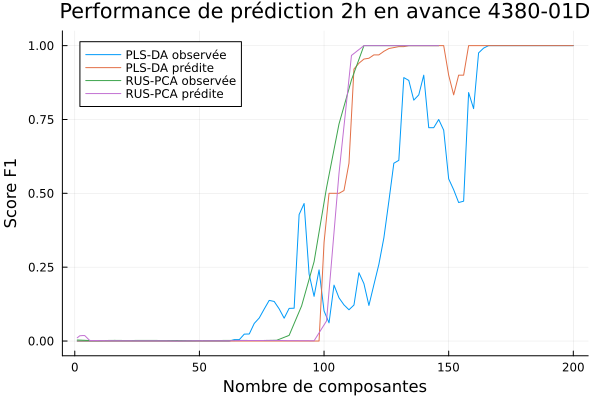

In [53]:
# CV

df_obs = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_F1_multiple_ncomp_obs.csv", DataFrame)
df_obs[!,:Method] .= "PLS-DA observée"
rename!(df_obs, :Components =>:k)
df_pred = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_F1_multiple_ncomp_pred.csv", DataFrame)
df_pred[!,:Method] .= "PLS-DA prédite"
rename!(df_pred, :Components =>:k)
df_PCA = CSV.read(raw"Résultats\5.4\5.4 - moyenne_RUS_PCA_with_Inverted_F1_.csv", DataFrame)
df_PCA[!,:Method] .= "RUS-PCA observée"
df_PCA_pred = CSV.read(raw"Résultats\5.4\5.4 - moyenne_RUS_PCA_with_Inverted_F1_pred_.csv", DataFrame)
df_PCA_pred[!,:Method] .= "RUS-PCA prédite"

df = vcat(df_obs, df_pred)
df = vcat(df, select(df_PCA, Not(:Cumulative_var)))
df = vcat(df, select(df_PCA_pred, Not(:Cumulative_var)))

this_site = filter(row-> row.Site == "4380-01D", df)

@df this_site plot(:k, :F1_mean, group = :Method, legend = :topleft)
ylims!(-0.05,1.05)
title!("Performance de prédiction 2h en avance 4380-01D")
xlabel!("Nombre de composantes")
ylabel!("Score F1")
#savefig(graph_folder *"plot_cv_4380-01D_pred.png")

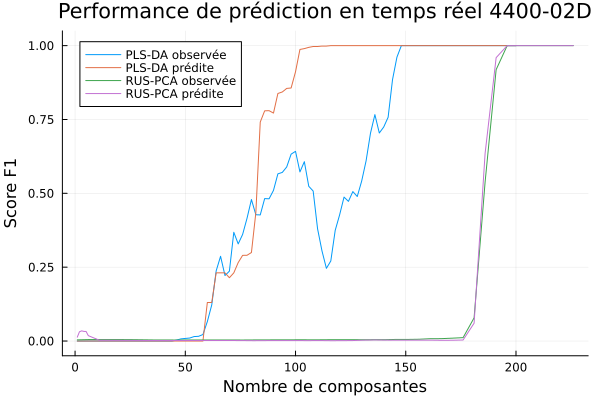

In [54]:
this_site = filter(row-> row.Site == "4400-02D", df)

@df this_site plot(:k, :F1_mean, group = :Method)
ylims!(-0.05,1.05)
title!("Performance de prédiction en temps réel 4400-02D")
xlabel!("Nombre de composantes")
ylabel!("Score F1")
#savefig(graph_folder *"plot_cv_4400-02D_pred.png")

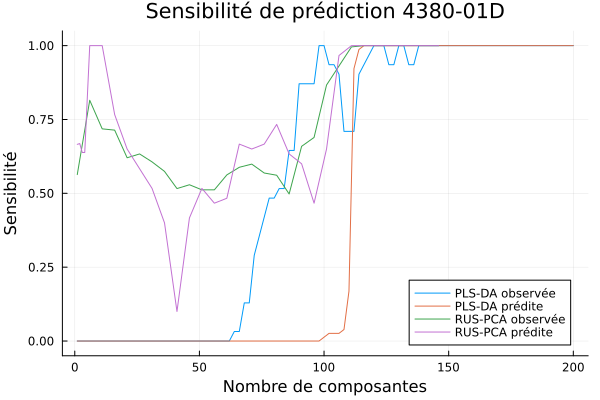

In [57]:
# Spécificité et sensibilité observé
df = DataFrame()

tp = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_TP_multiple_ncomp_obs.csv", DataFrame)
fn = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_FN_multiple_ncomp_obs.csv", DataFrame)
fp = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_FP_multiple_ncomp_obs.csv", DataFrame)
tn = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_TN_multiple_ncomp_obs.csv", DataFrame)

df = innerjoin(innerjoin(innerjoin(tp,fn, on = [:Components, :Site]), fp, on = [:Components, :Site]), tn, on = [:Components, :Site])
df[!, :Method] .= "PLS-DA observée"
rename!(df, :Components =>:k)

tp = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_TP_multiple_ncomp_pred.csv", DataFrame)
fn = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_FN_multiple_ncomp_pred.csv", DataFrame)
fp = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_FP_multiple_ncomp_pred.csv", DataFrame)
tn = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_TN_multiple_ncomp_pred.csv", DataFrame)

this = innerjoin(innerjoin(innerjoin(tp,fn, on = [:Components, :Site]), fp, on = [:Components, :Site]), tn, on = [:Components, :Site])
rename!(this, :Components =>:k)
this[!, :Method] .= "PLS-DA prédite"
df = vcat(df, this)

tp = select(CSV.read(raw"Résultats\5.4\5.4 - moyenne_RUS_PCA_with_Inverted_TP_pred_.csv", DataFrame), Not(:Cumulative_var))
rename!(tp, :tp_mean => :TP_mean)
fn = select(CSV.read(raw"Résultats\5.4\5.4 - moyenne_RUS_PCA_with_Inverted_FN_pred_.csv", DataFrame), Not(:Cumulative_var))
rename!(fn, :fn_mean => :FN_mean)
fp = select(CSV.read(raw"Résultats\5.4\5.4 - moyenne_RUS_PCA_with_Inverted_FP_pred_.csv", DataFrame), Not(:Cumulative_var))
rename!(fp, :fp_mean => :FP_mean)
tn = select(CSV.read(raw"Résultats\5.4\5.4 - moyenne_RUS_PCA_with_Inverted_TN_pred_.csv", DataFrame), Not(:Cumulative_var))
rename!(tn, :tn_mean => :TN_mean)

this = innerjoin(innerjoin(innerjoin(tp,fn, on = [:k, :Site]), fp, on = [:k, :Site]), tn, on = [:k, :Site])
this[!, :Method] .= "RUS-PCA prédite"
df = vcat(df, this)



tp = select(CSV.read(raw"Résultats\5.4\5.4 - moyenne_RUS_PCA_with_Inverted_TP_.csv", DataFrame), Not(:Cumulative_var))
rename!(tp, :tp_mean => :TP_mean)
fn = select(CSV.read(raw"Résultats\5.4\5.4 - moyenne_RUS_PCA_with_Inverted_FN_.csv", DataFrame), Not(:Cumulative_var))
rename!(fn, :fn_mean => :FN_mean)
fp = select(CSV.read(raw"Résultats\5.4\5.4 - moyenne_RUS_PCA_with_Inverted_FP_.csv", DataFrame), Not(:Cumulative_var))
rename!(fp, :fp_mean => :FP_mean)
tn = select(CSV.read(raw"Résultats\5.4\5.4 - moyenne_RUS_PCA_with_Inverted_TN_.csv", DataFrame), Not(:Cumulative_var))
rename!(tn, :tn_mean => :TN_mean)

this = innerjoin(innerjoin(innerjoin(tp,fn, on = [:k, :Site]), fp, on = [:k, :Site]), tn, on = [:k, :Site])
this[!, :Method] .= "RUS-PCA observée"
df = vcat(df, this)




#f1 = CSV.read(raw"Résultats\5.4\5.4 - moyenne_PLS-DA_Inverted_F1_multiple_ncomp_obs.csv", DataFrame)
#f1.F1_mean .== (2 .* this.TP_mean ./ (2 .* this.TP_mean .+ this.FP_mean .+ this.FN_mean))


df[!, :sensibilite] = df.TP_mean ./ (df.TP_mean .+ df.FN_mean)
df[!,:specificite] = df.TN_mean ./ (df.TN_mean .+ df.FP_mean)


this_site = filter(row-> row.Site == "4380-01D", df)

@df this_site plot(:k, :sensibilite, group = :Method, legend = :bottomright)
ylims!(-0.05,1.05)
title!("Sensibilité de prédiction 4380-01D")
xlabel!("Nombre de composantes")
ylabel!("Sensibilité")
#savefig(graph_folder *"plot_cv_4380-01D_pred_sensibilite.png")

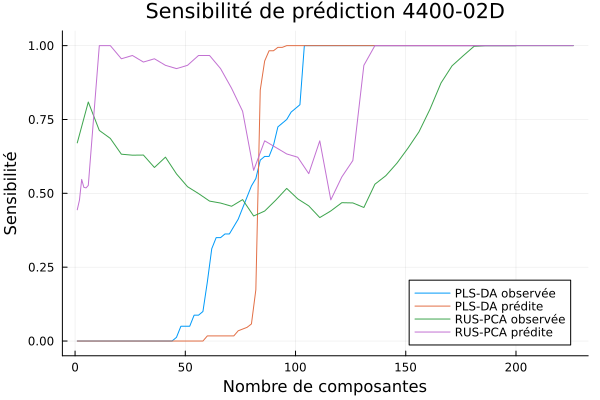

In [58]:
this_site = filter(row-> row.Site == "4400-02D", df)

@df this_site plot(:k, :sensibilite, group = :Method, legend = :bottomright)
ylims!(-0.05,1.05)
title!("Sensibilité de prédiction 4400-02D")
xlabel!("Nombre de composantes")
ylabel!("Sensibilité")
#savefig(graph_folder *"plot_cv_4400-02D_pred_sensibilite.png")

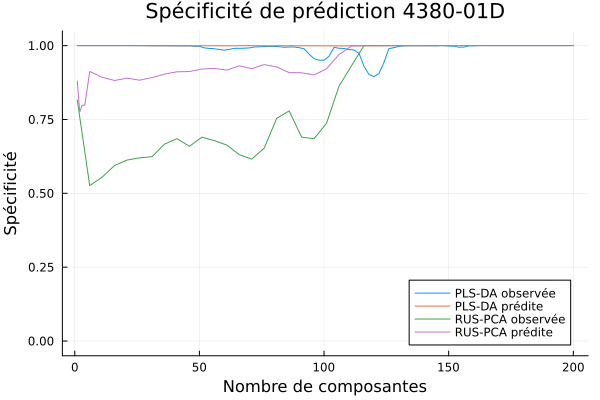

In [59]:
this_site = filter(row-> row.Site == "4380-01D", df)

@df this_site plot(:k, :specificite, group = :Method, legend = :bottomright)
ylims!(-0.05,1.05)
title!("Spécificité de prédiction 4380-01D")
xlabel!("Nombre de composantes")
ylabel!("Spécificité")
#savefig(graph_folder *"plot_cv_4380-01D_pred_specificite.png")

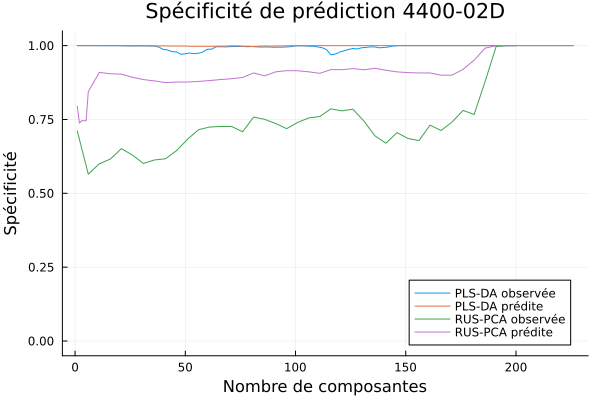

In [60]:
this_site = filter(row-> row.Site == "4400-02D", df)

@df this_site plot(:k, :specificite, group = :Method, legend = :bottomright)
ylims!(-0.05,1.05)
title!("Spécificité de prédiction 4400-02D")
xlabel!("Nombre de composantes")
ylabel!("Spécificité")
#savefig(graph_folder *"plot_cv_4400-02D_pred_specificite.png")